In [1]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats, optimize, interpolate
from scipy.integrate import odeint
plt.rcParams.update({'font.size': 18})

In [2]:
phi0 = 100e-6
L = 100*phi0
rp0 = phi0/2
nz = 1000
dt = 10000
z = np.linspace(0,L,nz)
alpha = 10
P = 20000 # Pa
T = 1273 # K
R = 8.314 # J/mol K
CMTS0 = (1/(1+alpha))*(P / (R*T)) 
dCMTS0dz = 0
k0 = 38.9e9
Ea = 296e3
k_het = k0*np.exp(-Ea/(R*T))*CMTS0
#k_het = 0.017
dK = 3.97
D_g=dK*phi0*T**0.5 # m^2/s
Vs=1.249e-5

print('D_g=',D_g,'k_het =',k_het,'T=',T,'P=',P, 'CMTS0=',CMTS0)

rpi = rp0*np.ones(nz)
rp = rpi
drpdzi = np.zeros(nz)
drpdz = drpdzi

x = np.zeros(nz)

# zi = z*nz/L
# print(zi)

Ct = []
rpt = []


n = 0
while any(rp<rp0/100) is not True:

    def C_derivatives(x,z):
        return [x[1],-x[0]*((2*k_het)/(rp[int(z)]*D_g))-x[1]*((2/rp[int(z)])*drpdz[int(z)])] # rp[z]

    C, dCdz = odeint(C_derivatives,[CMTS0,dCMTS0dz], z).T
    
    if n == 1:
        print(C.shape)
        print(dCdz.shape)
    
    condition = C<0
    if any(condition):
        C[condition.argmax():] = 0
    
    rp = rp*(1-dt*k_het*C*Vs)
    k_het = k0*np.exp(-Ea/(R*T))*C[1]
    drpdz[:-1] = (rp[1:] - rp[:-1])/nz
    drpdz[-1] = drpdz[-2]
    
    n+=1
    if n % 1000 == 0:
        Ct.append(C)
        rpt.append(rp)
        percent_closed = 100*(1 -(rp[0]-rp0/100)/rp0)
        print('n=',n,': at t =',round(n*dt*0.000277778,2),'hours, pore is', round(percent_closed,2),'% closed')

rpl = len(rpt)
print(n)

D_g= 0.014164612843279552 k_het = 0.004773397707425727 T= 1273 P= 20000 CMTS0= 0.1717903983288505
(1000,)
(1000,)
n= 1000 : at t = 2777.78 hours, pore is 10.74 % closed
n= 2000 : at t = 5555.56 hours, pore is 19.52 % closed
n= 3000 : at t = 8333.34 hours, pore is 27.46 % closed
n= 4000 : at t = 11111.12 hours, pore is 34.62 % closed
n= 5000 : at t = 13888.9 hours, pore is 41.08 % closed
n= 6000 : at t = 16666.68 hours, pore is 46.91 % closed
n= 7000 : at t = 19444.46 hours, pore is 52.18 % closed
n= 8000 : at t = 22222.24 hours, pore is 56.93 % closed
n= 9000 : at t = 25000.02 hours, pore is 61.22 % closed
n= 10000 : at t = 27777.8 hours, pore is 65.09 % closed
n= 11000 : at t = 30555.58 hours, pore is 68.59 % closed
n= 12000 : at t = 33333.36 hours, pore is 71.74 % closed
n= 13000 : at t = 36111.14 hours, pore is 74.59 % closed
n= 14000 : at t = 38888.92 hours, pore is 77.16 % closed
n= 15000 : at t = 41666.7 hours, pore is 79.48 % closed
n= 16000 : at t = 44444.48 hours, pore is 81.5

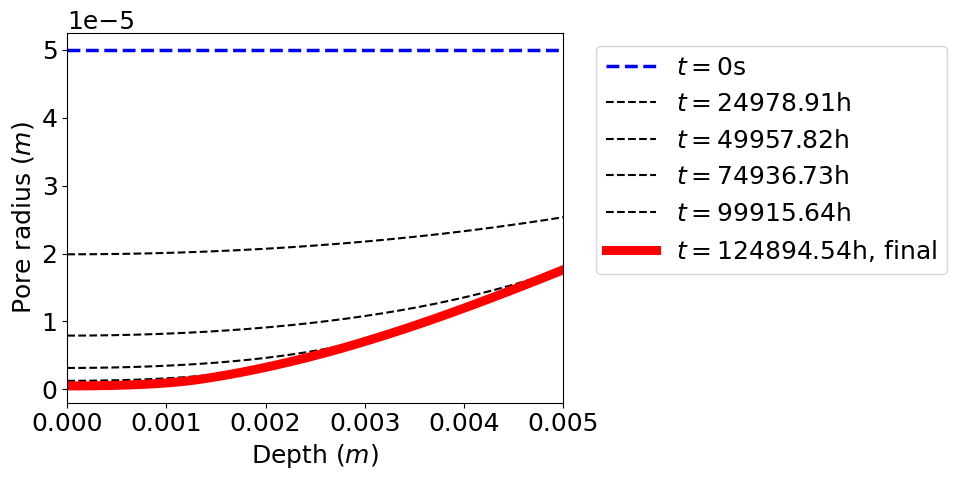

In [3]:
plt.plot(z,rpi,'b--', label=r'$t=0$s',linewidth=2.5)
plt.plot(z,rpt[int(1*rpl/5)],'k--', label=r'$t=$%.2fh' %(1*n*0.000277778*dt/5),linewidth=1.5)
plt.plot(z,rpt[int(2*rpl/5)],'k--', label=r'$t=$%.2fh' %(2*n*0.000277778*dt/5),linewidth=1.5)
plt.plot(z,rpt[int(3*rpl/5)],'k--', label=r'$t=$%.2fh' %(3*n*0.000277778*dt/5),linewidth=1.5)
plt.plot(z,rpt[int(4*rpl/5)],'k--', label=r'$t=$%.2fh' %(4*n*0.000277778*dt/5),linewidth=1.5)
plt.plot(z,rp,'r', label=r'$t=$%.2fh, final' %(n*0.000277778*dt),linewidth=6.5)
# plt.ylim([0,rp0])
plt.xlim([0,L/2])
#rp_init = np.ones(1000)
plt.xlabel(r'Depth $(m)$')
plt.ylabel(r'Pore radius $(m)$')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.savefig('rpz.png', dpi=220,bbox_inches='tight')


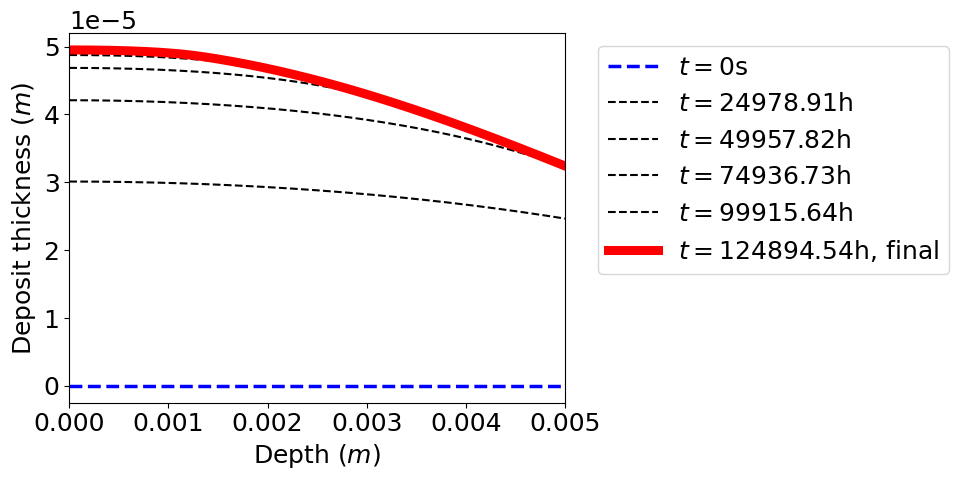

In [5]:
plt.plot(z,rp0-rpi,'b--', label=r'$t=0$s',linewidth=2.5)
plt.plot(z,rp0-rpt[int(1*rpl/5)],'k--', label=r'$t=$%.2fh' %(1*n*0.000277778*dt/5),linewidth=1.5)
plt.plot(z,rp0-rpt[int(2*rpl/5)],'k--', label=r'$t=$%.2fh' %(2*n*0.000277778*dt/5),linewidth=1.5)
plt.plot(z,rp0-rpt[int(3*rpl/5)],'k--', label=r'$t=$%.2fh' %(3*n*0.000277778*dt/5),linewidth=1.5)
plt.plot(z,rp0-rpt[int(4*rpl/5)],'k--', label=r'$t=$%.2fh' %(4*n*0.000277778*dt/5),linewidth=1.5)
plt.plot(z,rp0-rp,'r', label=r'$t=$%.2fh, final' %(n*0.000277778*dt),linewidth=6.5)
# plt.ylim([0,rp0])
plt.xlim([0,L/2])
#rp_init = np.ones(1000)
plt.xlabel(r'Depth $(m)$')
plt.ylabel(r'Deposit thickness $(m)$')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.savefig('dz.png', dpi=220,bbox_inches='tight')


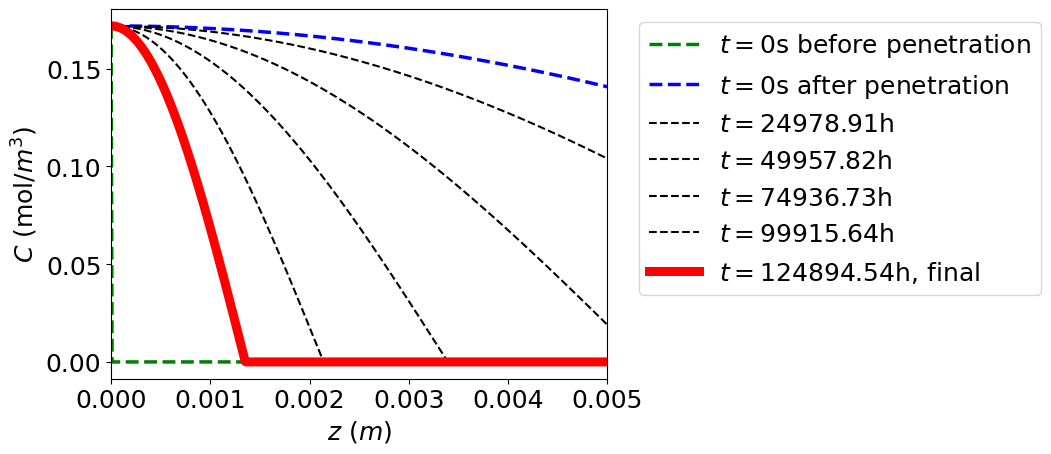

In [4]:
initial_initial_C = np.zeros(nz)
initial_initial_C[0] = (1/(1+alpha))*(P / (R*T)) 
plt.plot(z,initial_initial_C,'g--', label= r'$t=0$s before penetration',linewidth=2.5)
plt.plot(z,Ct[0],'b--', label=r'$t=0$s after penetration',linewidth=2.5)
plt.plot(z,Ct[int(1*rpl/5)],'k--', label=r'$t=$%.2fh' %(1*n*0.000277778*dt/5),linewidth=1.5)
plt.plot(z,Ct[int(2*rpl/5)],'k--', label=r'$t=$%.2fh' %(2*n*0.000277778*dt/5),linewidth=1.5)
plt.plot(z,Ct[int(3*rpl/5)],'k--', label=r'$t=$%.2fh' %(3*n*0.000277778*dt/5),linewidth=1.5)
plt.plot(z,Ct[int(4*rpl/5)],'k--', label=r'$t=$%.2fh' %(4*n*0.000277778*dt/5),linewidth=1.5)
plt.plot(z,C,'r', label=r'$t=$%.2fh, final' %(5*n*0.000277778*dt/5),linewidth=6.5)
plt.xlabel(r'$z \ (m)$')
plt.ylabel(r'$C \ ($mol$/m^3)$')
# plt.ylim([0,rp0])
plt.xlim([0,L/2])
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.savefig('Cz.png', dpi=220,bbox_inches='tight')

In [6]:
# print(z)
# print(rp)